In [1]:
import scanpy as sc
import numpy as np

In [2]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_2022.h5ad")

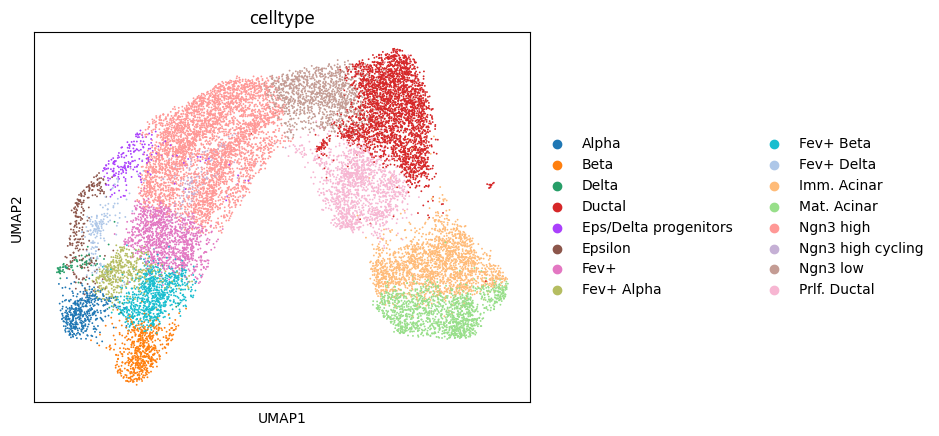

In [3]:
sc.pl.umap(adata, color="celltype")

In [4]:
sc.tl.leiden(adata, restrict_to=("celltype", ["Eps/Delta progenitors"]), resolution=0.3, key_added="split_eps_progenitors")


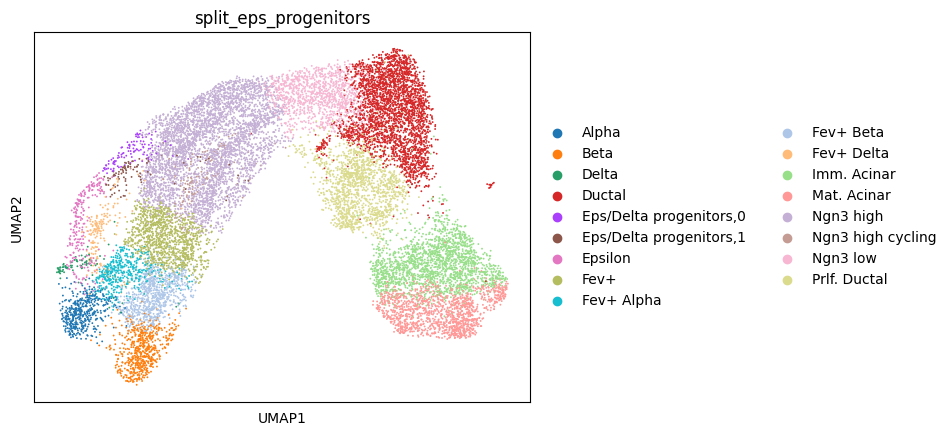

In [5]:
sc.pl.umap(adata, color="split_eps_progenitors")

In [6]:
sc.tl.leiden(adata, restrict_to=("celltype", ["Ngn3 high"]), resolution=0.5, key_added="split_ngn3_high")


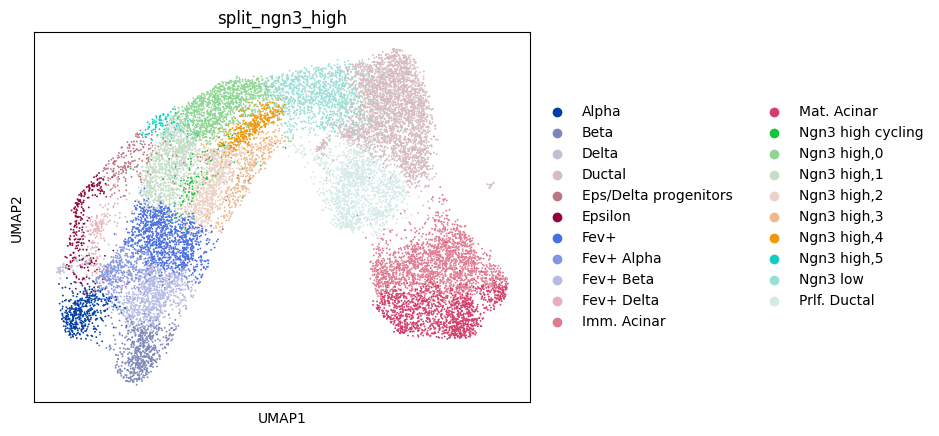

In [7]:
sc.pl.umap(adata, color="split_ngn3_high")

In [8]:
sc.tl.leiden(adata, restrict_to=("celltype", ["Fev+ Delta"]), resolution=0.5, key_added="split_fev_delta")


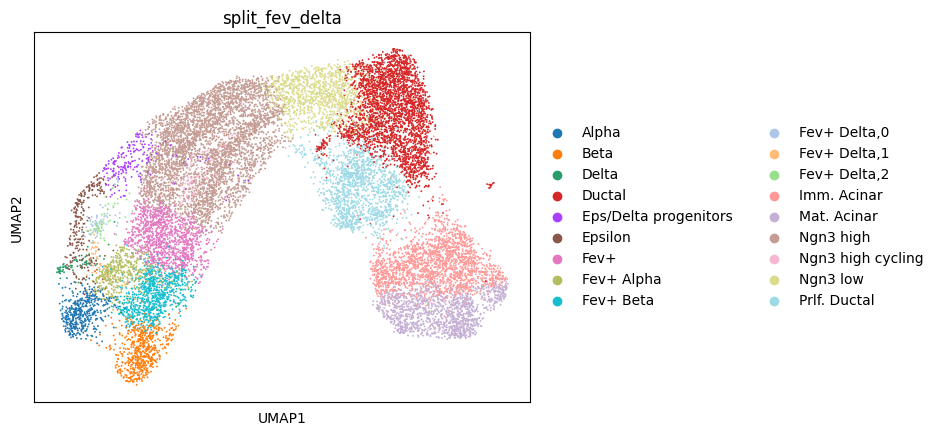

In [9]:
sc.pl.umap(adata, color="split_fev_delta")

In [10]:
x,y = 'sample', 'split_eps_progenitors'
df = adata.obs.copy()
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

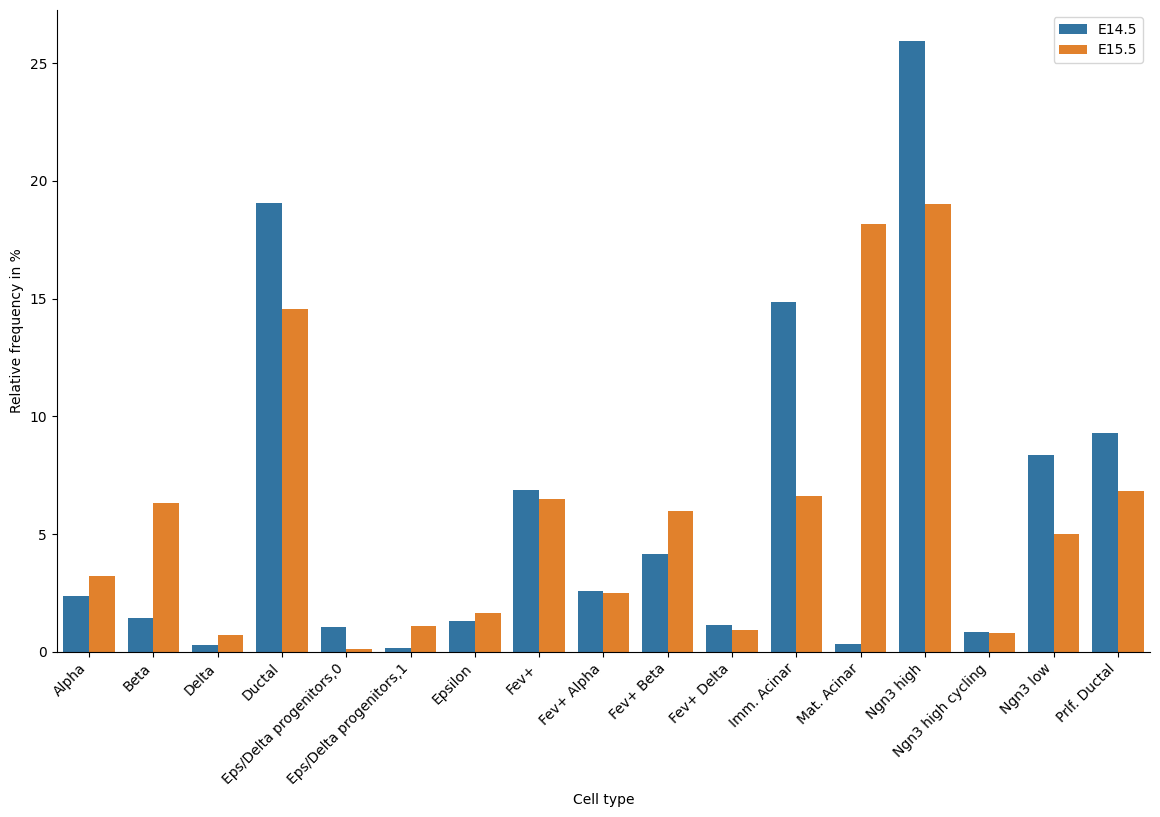

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(x="level_1",y='percent',hue=x,kind='bar',data=df1, legend=False,height=8.27, aspect=11.7/8.27)
plt.xlabel("Cell type")
plt.ylabel("Relative frequency in %")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()


In [13]:
x,y = 'sample', 'split_ngn3_high'
df = adata.obs.copy()
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

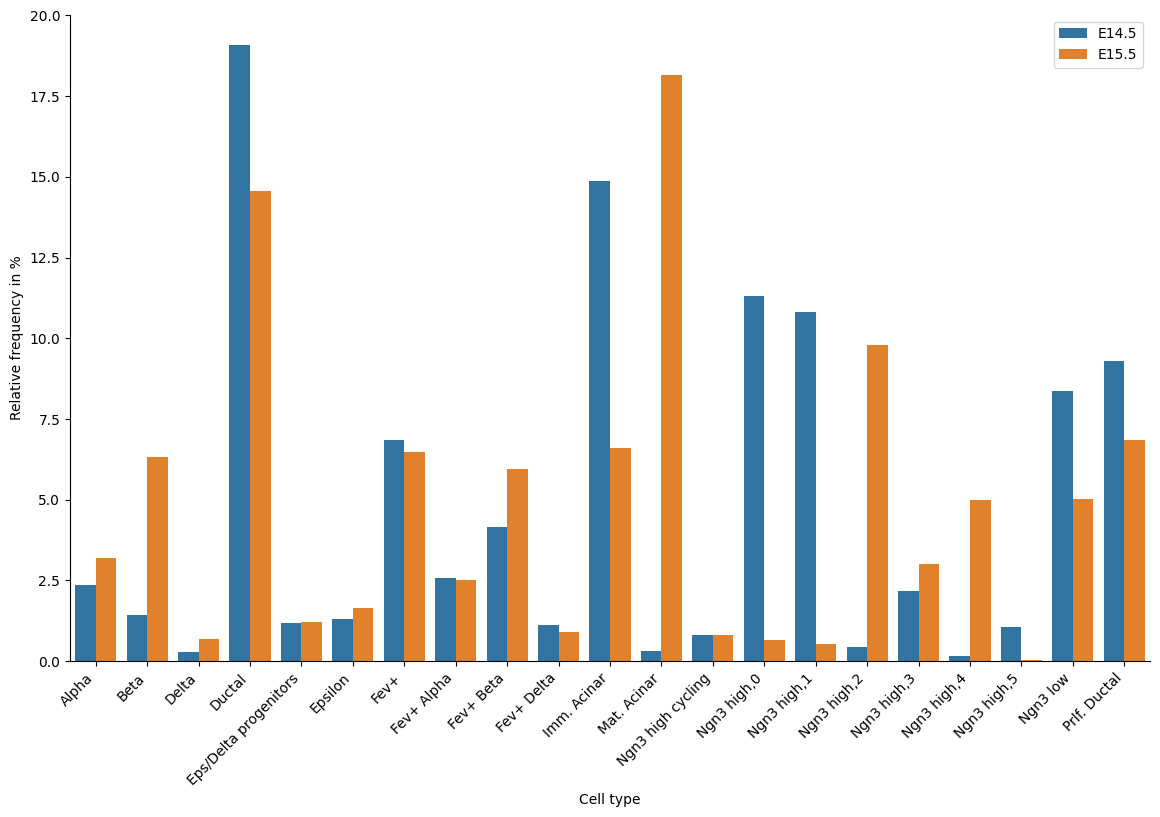

In [14]:
g = sns.catplot(x="level_1",y='percent',hue=x,kind='bar',data=df1, legend=False,height=8.27, aspect=11.7/8.27)
plt.xlabel("Cell type")
plt.ylabel("Relative frequency in %")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()

In [15]:
x,y = 'sample', 'split_fev_delta'
df = adata.obs.copy()
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

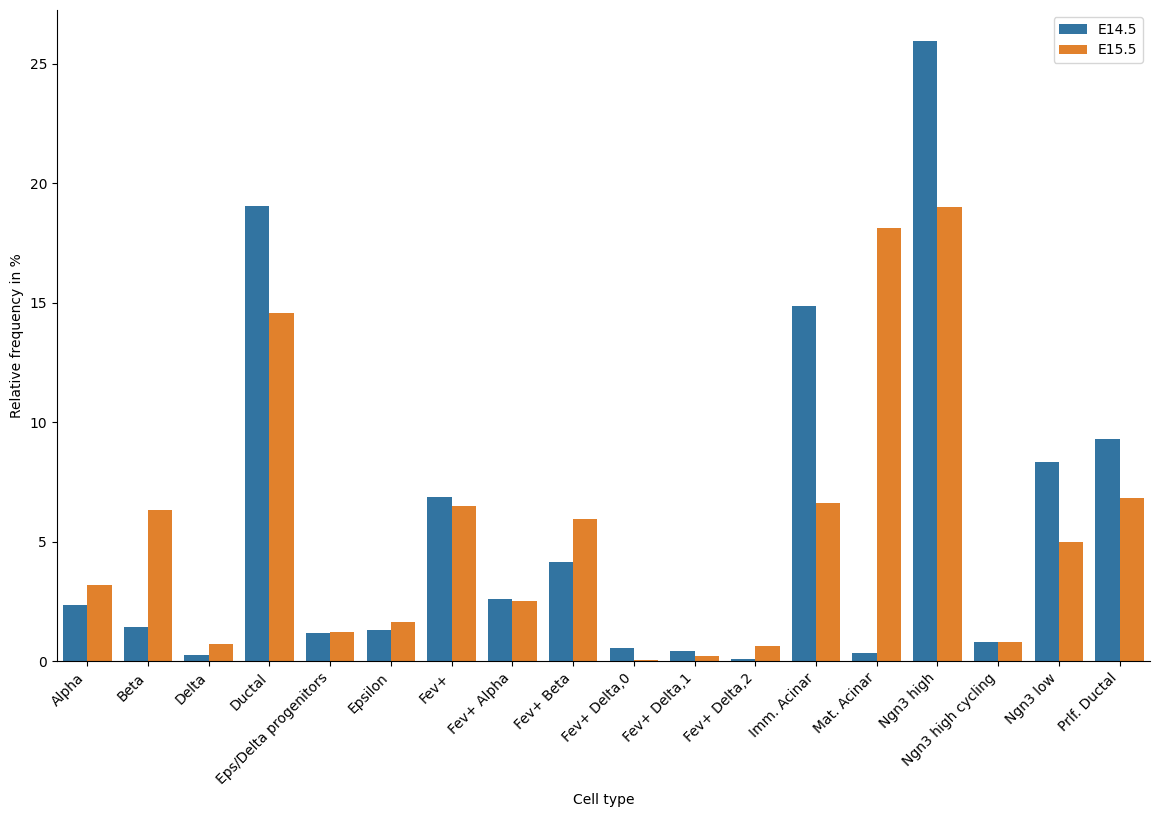

In [16]:
g = sns.catplot(x="level_1",y='percent',hue=x,kind='bar',data=df1, legend=False,height=8.27, aspect=11.7/8.27)
plt.xlabel("Cell type")
plt.ylabel("Relative frequency in %")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()

In [18]:
del adata.layers

In [21]:
del adata.uns

In [22]:
adata.write("/lustre/groups/ml01/workspace/moscot_paper/pancreas/endocrine_refinement.h5ad")


In [23]:
adata.obs

,n_counts,sample,int_id,reporter,log_cell_probs,cell_barcodes_du,cell_barcodes_cr,cell_barcodes,log_counts,n_genes,...,leiden_sub14,leiden_sub15,leiden_sub16,leiden_sub17,leiden_sub18,leiden_sub19,celltype,split_eps_progenitors,split_ngn3_high,split_fev_delta
AAACAGCCAACAGCCT-1-0,8457.0,E14.5,4xx,Neurog3-Venus-Fusion,-12538.516611,1,1,2,9.042749,3651,...,17,17,17,17,17,"17,0",Fev+ Alpha,Fev+ Alpha,Fev+ Alpha,Fev+ Alpha
AAACAGCCAACCCTCC-1-0,7841.0,E14.5,4xx,Neurog3-Venus-Fusion,-10665.635853,1,1,2,8.967122,3120,...,"6,0","6,0","6,0","6,0","6,0","6,0",Fev+,Fev+,Fev+,Fev+
AAACAGCCACCTGTAA-1-0,9492.0,E14.5,4xx,Neurog3-Venus-Fusion,-15545.684333,1,1,2,9.158205,3938,...,"8,0","8,0","8,0","8,0","8,0","8,0",Imm. Acinar,Imm. Acinar,Imm. Acinar,Imm. Acinar
AAACAGCCACTAAGCC-1-0,7915.0,E14.5,4xx,Neurog3-Venus-Fusion,-12149.266909,1,1,2,8.976515,3318,...,"6,0","6,0","6,0","6,0","6,0","6,0",Fev+,Fev+,Fev+,Fev+
AAACAGCCAGGATAAC-1-0,9193.0,E14.5,4xx,Neurog3-Venus-Fusion,-11208.509422,1,1,2,9.126198,3666,...,"4,1","4,1","4,1","4,1","4,1","4,1",Ngn3 high,Ngn3 high,"Ngn3 high,3",Ngn3 high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCTTGTTCG-1-1,9644.0,E15.5,4xx,Neurog3-Venus-Fusion,-17196.982412,1,1,2,9.174091,4703,...,"13,0","13,0","13,0","13,0","13,0","13,0",Ductal,Ductal,Ductal,Ductal
TTTGTTGGTATTGAGT-1-1,8914.0,E15.5,4xx,Neurog3-Venus-Fusion,-13303.741618,1,1,2,9.095378,3772,...,"5,0","5,0","5,0","5,0","5,0","5,0",Ngn3 low,Ngn3 low,Ngn3 low,Ngn3 low
TTTGTTGGTCCTAAGA-1-1,9689.0,E15.5,4xx,Neurog3-Venus-Fusion,-16358.359709,1,1,2,9.178746,4540,...,"13,0","13,0","13,0","13,0","13,0","13,0",Ductal,Ductal,Ductal,Ductal
TTTGTTGGTTAACAGT-1-1,9570.0,E15.5,4xx,Neurog3-Venus-Fusion,-16296.427054,1,1,2,9.166389,4502,...,14,"14,0","14,0","14,0","14,0","14,0",Mat. Acinar,Mat. Acinar,Mat. Acinar,Mat. Acinar
